In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Extraction of zipfile & Data Loading

In [5]:
data = pd.read_csv('data/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Some facts about the dataset:
- The dataset is a collection of handwritten digits (0-9) from the MNIST database.
- Each image is a 28x28 pixel grayscale image.
- 42000 rows indicate the number of images
- 784 columns indicate the number of pixels in each image
- 0-9 labels indicate the digit represented by the image
- the value of each pixel is between 0-255 where 0 is black and 255 is white

In [6]:
# Convert the DataFrame to a NumPy array
data = np.array(data)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [16]:
data[:, 0]

array([1, 0, 1, ..., 7, 6, 9])

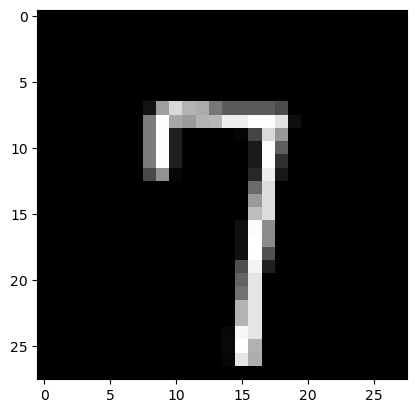

In [18]:
image = data[50,1:].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.show()

In [19]:
labels = data[:, 0].astype(int)  
pixels = data[:, 1:]
pixels.shape

(42000, 784)

### Normalization:

Scale pixel values from [0, 255] to [0, 1]

Why?: Prevents large input values from destabilizing gradients.

In [32]:
pixels = pixels / 255.0
pixels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### One-Hot Encoding:

Convert labels to 10-dimensional vectors (e.g., label 3 → [0,0,0,1,0,0,0,0,0,0])

Why?: Matches the output layer dimension for softmax classification.

In [33]:
num_labels = len(np.unique(labels))
num_labels

10

In [34]:
# can write a onehot function 
one_hot_labels = np.eye(num_labels)[labels]  # Shape: (42000, 10)
one_hot_labels.shape

(42000, 10)

### Train and Validation split

In [37]:
pixels[:40000].shape

(40000, 784)

In [39]:
# should we randomise the dataset for better results ?
X_train, X_test = pixels[:40000], pixels[40000:]
Y_train, Y_test = one_hot_labels[:40000], one_hot_labels[40000:]

In [40]:
# Check the shape of the training and test sets
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(40000, 784) (40000, 10)
(2000, 784) (2000, 10)


### Initialization of weights and biases 

In [41]:
# Generate random numbers
uniform_random_numbers = np.random.rand(3, 2)
normal_random_numbers = np.random.randn(3, 2)
print(uniform_random_numbers)
print(normal_random_numbers)

[[0.94027361 0.95005829]
 [0.28556778 0.9849777 ]
 [0.39436223 0.43411518]]
[[ 2.20163852  1.36614437]
 [-0.85390301  0.8905027 ]
 [ 0.10171543  0.60226587]]


In [106]:
n = 10  # Example value for n
scaling_factor = np.sqrt(2 / n)

# Generate a 3x2 array of random numbers from a standard normal distribution
normal_random_numbers = np.random.randn(3, 2)

# Scale the random numbers
scaled_random_numbers = normal_random_numbers * scaling_factor

print("Original random numbers:\n", normal_random_numbers)
print("Scaled random numbers:\n", scaled_random_numbers)

Original random numbers:
 [[-0.65656939 -0.19794362]
 [-1.54123519 -0.05240382]
 [ 0.38850029  0.60545812]]
Scaled random numbers:
 [[-0.29362676 -0.08852308]
 [-0.68926133 -0.0234357 ]
 [ 0.17374261  0.2707691 ]]


Some reasons for the chosen initialization:
- **Xavier Initialization**: Suitable for tanh activation functions. It keeps the variance of activations and gradients the same across layers.
- **He Initialization**: Suitable for ReLU activation functions. It helps in maintaining the variance of activations and gradients across layers.
- **Xavier Initialization**: Variance of weights is set to 1/n, where n is the number of input neurons.
- **He Initialization**: Variance of weights is set to 2/n, where n is the number of input neurons.

ReLU sets half the neurons to zero during forward propagation. He initialization compensates for this by doubling the variance of the weights, ensuring the output variance remains stable (prevents gradients from vanishing or exploding).

Some reasons for the selection of 128 neurons:
- **Empirical Evidence**: 128 neurons have been found to work well in practice for many tasks.
- **Computational Efficiency**: 128 neurons are computationally efficient for training and inference.
- **Flexibility**: 128 neurons provide a good balance between model complexity and generalization.
- **Rule of Thumb**: Start with a hidden layer size between the input (784) and output (10) layers.

Why the dimension of 784,128?

For a layer with n_input neurons and n_output neurons, weights must have shape (n_input, n_output) as per matrix multiplication rules.

In [42]:
def initialize_parameters():
    np.random.seed(42)  # Fix randomness for reproducibility
    
    W1 = np.random.randn(784, 128) * np.sqrt(2 / 784)  # He initialization for ReLU
    b1 = np.zeros((1, 128))                             # Zero bias
    W2 = np.random.randn(128, 10) * np.sqrt(2 / 128)    # He initialization
    b2 = np.zeros((1, 10))                              # Zero bias
    return W1, b1, W2, b2

### Forward propogation 

In [109]:
# def ReLU(Z):
#     return np.maximum(Z, 0)

# def softmax(Z):
#     A = np.exp(Z) / sum(np.exp(Z))
#     return A
    
# def forward_prop(W1, b1, W2, b2, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def ReLU_deriv(Z):
#     return Z > 0

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

Why z - np.max ?

 If values in Z are large (e.g., 1000), np.exp(Z) becomes inf (overflow). therefore we Subtract the maximum value in Z before exponentiation

In [110]:
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1    # Shape: (batch_size, 128)
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2   # Shape: (batch_size, 10)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Loss Calculation

In [111]:
def compute_loss(Y_pred, Y_true):
    return -np.mean(np.sum(Y_true * np.log(Y_pred + 1e-15), axis=1))  # +1e-15 to avoid log(0)

### Backward Propogation

In [112]:
# def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1 / m * dZ2.dot(A1.T)
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1.dot(X.T)
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = b1 - alpha * db1    
#     W2 = W2 - alpha * dW2  
#     b2 = b2 - alpha * db2    
#     return W1, b1, W2, b2

In [113]:
def backward(X, Y, Z1, A1, A2, W2):
    batch_size = X.shape[0]
    
    # Output layer gradients
    dZ2 = A2 - Y                            # Shape: (batch_size, 10)
    dW2 = (A1.T @ dZ2) / batch_size          # Shape: (128, 10)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size
    
    # Hidden layer gradients
    dZ1 = (dZ2 @ W2.T) * (Z1 > 0)           # Shape: (batch_size, 128)
    dW1 = (X.T @ dZ1) / batch_size           # Shape: (784, 128)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size
    
    return dW1, db1, dW2, db2

### Parameter update

In [114]:
# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = b1 - alpha * db1    
#     W2 = W2 - alpha * dW2  
#     b2 = b2 - alpha * db2    
#     return W1, b1, W2, b2

In [115]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=0.1):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

### Training loop

In [116]:
# def get_predictions(A2):
#     return np.argmax(A2, 0)

# def get_accuracy(predictions, Y):
#     print(predictions, Y)
#     return np.sum(predictions == Y) / Y.size

# def gradient_descent(X, Y, alpha, iterations):
#     W1, b1, W2, b2 = init_params()
#     for i in range(iterations):
#         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#         dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
#         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#         if i % 10 == 0:
#             print("Iteration: ", i)
#             predictions = get_predictions(A2)
#             print(get_accuracy(predictions, Y))
#     return W1, b1, W2, b2

In [117]:
def train(X_train, Y_train, epochs=100, batch_size=64, lr=0.1):
    W1, b1, W2, b2 = initialize_parameters()
    
    for epoch in range(epochs):
        # Shuffle data
        permutation = np.random.permutation(X_train.shape[0])
        X_shuffled = X_train[permutation]
        Y_shuffled = Y_train[permutation]
        
        # Mini-batch training
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            
            # Forward pass
            Z1, A1, Z2, A2 = forward(X_batch, W1, b1, W2, b2)
            
            # Backward pass
            dW1, db1, dW2, db2 = backward(X_batch, Y_batch, Z1, A1, A2, W2)
            
            # Update parameters
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        
        # Print loss every 10 epochs
        if epoch % 10 == 0:
            _, _, _, A2 = forward(X_train, W1, b1, W2, b2)
            loss = compute_loss(A2, Y_train)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W1, b1, W2, b2

### Result

<!-- W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) -->

In [118]:
def accuracy(X, Y, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    predictions = np.argmax(A2, axis=1)
    true_labels = np.argmax(Y, axis=1)
    return np.mean(predictions == true_labels)

# Train the model
W1, b1, W2, b2 = train(X_train, Y_train)

# Test accuracy
test_acc = accuracy(X_test, Y_test, W1, b1, W2, b2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 0, Loss: 0.2615
Epoch 10, Loss: 0.0562
Epoch 20, Loss: 0.0251
Epoch 30, Loss: 0.0120
Epoch 40, Loss: 0.0075
Epoch 50, Loss: 0.0049
Epoch 60, Loss: 0.0035
Epoch 70, Loss: 0.0027
Epoch 80, Loss: 0.0022
Epoch 90, Loss: 0.0018
Test Accuracy: 97.20%
